#### # Youtube '허민석'님 영상을 공부하고 노트형식으로 정리한 자료입니다.

- youtube채널 : https://www.youtube.com/user/TheEasyoung
- 영상제목 : [머신러닝] PCA 차원 축소 알고리즘 및 파이썬 구현 (주성분 분석)

### # PCA 목적


- 다차원의 데이터를 3차원 이하로 축소하여 차트로 시각화


- 이미지 데이터의 노이즈 감소


- 적은 차원의 공간에 저장하므로써 메모리를 절약


- 데이터의 차원을 축소하므로써 데이터를 처리하는 시간 및 저장공간 절약

### # PCA 알고리즘

- 만약에 2차원 공간상에 데이터들이 분포한다고 할때 어떻게 차원을 줄일 수 있을까


- 가장 먼저생각할 수 있는 방법은 하나의 축에 점을 전부 몰아넣는 것이다. 이럴경우 정보가 겹치거나 유실되는 경우가 발생한다.


- 그렇다면 좀 더 발전된 방법이 없을까?


- 데이터의 분산이 가장 넓은 축의 직선을 찾는다. (Principal Component를 찾는다)


- 이럴경우 정보가 겹치거나 유실되는 것을 최소화할 수 있다.


- 이 Principal Component는 수학적으로 접근했을때 Eigen vector from Covariance Matrix다. Eigenvalue는 데이터 차원수만큼 존재하는데 우리는 가장 넓게 퍼져있는 Eigenvector를 설정해야한다. 그러려면 Eigenvalue가 가장 큰 즉 분산이 가장 넓은 Eigenvector를 설정해햐한다.


- 다시말해 공분산행렬에서 Eigenvalue가 가장 높은 것의 Eigenvector를 기준으로 점들을 전부 옮기면 된다.

### # 실제 예시 데이터를 이용한 PCA 알고리즘 구현 실습

#### 1. 예제 데이터 생성

In [1]:
# Eating, exercise habbit and their body shape
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

In [2]:
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [3]:
df

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


#### 2. features 와 target 데이터를 분리

In [4]:
# X is feature vectors
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]

# Y is labels
Y = df[['body_shape']]

#### 3. feature 데이터에 대한 노멀라이징 실시

In [5]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)
x_std

C:\Users\minman\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\minman\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

#### 4. feature 데이터에 대한 공분산행렬 확인

In [6]:
# features are columns from x_std
features = x_std.T
covariance_matrix = np.cov(features)
covariance_matrix

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

#### 5. 공분산행렬로부터 'EigenVectors' 와 'EigenValues' 확인

In [7]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [8]:
eig_vecs

array([[ 0.508005  ,  0.0169937 , -0.84711404,  0.11637853,  0.10244985],
       [ 0.44660335,  0.36890361,  0.12808055, -0.63112016, -0.49973822],
       [ 0.38377913, -0.70804084,  0.20681005, -0.40305226,  0.38232213],
       [ 0.42845209,  0.53194699,  0.3694462 ,  0.22228235,  0.58954327],
       [-0.46002038,  0.2816592 , -0.29450345, -0.61341895,  0.49601841]])

In [9]:
eig_vals

array([4.0657343 , 0.8387565 , 0.07629538, 0.27758568, 0.2971837 ])

In [10]:
# We reduce dimension to 1 dimension, since 1 eigenvector has 73% (enough) variances
eig_vals[0] / sum(eig_vals)

0.7318321731427544

#### 6. Eigenvector상에 데이터들을 배치

- Eigenvalue가 가장 큰값의 Eigenvector를 기준으로 projection해준다.
- 단위벡터에 대한 투영길이는 내적이므로 `x_std.dot(eig_vecs.T[0])`을 하였다.

In [11]:
eig_vecs.T[0]

array([ 0.508005  ,  0.44660335,  0.38377913,  0.42845209, -0.46002038])

In [12]:
projected_X = x_std.dot(eig_vecs.T[0])
projected_X

array([-2.22600943, -0.0181432 ,  1.76296611, -2.73542407,  3.02711544,
       -2.14702579, -0.37142473,  2.59239883, -0.39347815,  0.50902498])

In [14]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y
result

,PC1,y-axis,label
0,-2.226009,0.0,Skinny
1,-0.018143,0.0,Normal
2,1.762966,0.0,Fat
3,-2.735424,0.0,Skinny
4,3.027115,0.0,Fat
5,-2.147026,0.0,Skinny
6,-0.371425,0.0,Normal
7,2.592399,0.0,Fat
8,-0.393478,0.0,Normal
9,0.509025,0.0,Fat


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

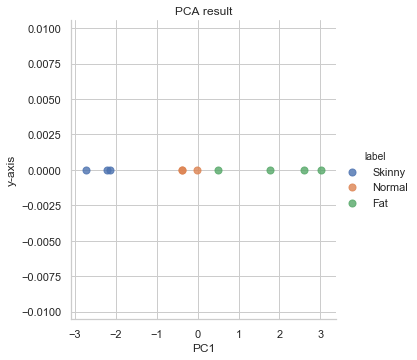

In [15]:
sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False,  
           # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, 
           # marker size
           hue="label")

plt.title('PCA result')

plt.show()

#### 7. Scikit-learn에서 제공하는 PCA 클래스 실습

- Scikit-learn에서 제공하는 PCA 클래스를 이용하면 위에서 numpy 등을 이용해서 복잡하게 계산할 필요가 없다.

In [20]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=1)
# n_components=1 -> 1차원으로 축소하겠다.

sklearn_pca_x = pca.fit_transform(x_std)
# fit_transform -> 특징행렬을 낮은 차원의 근사행렬로 변환하겠다.

- components_ 메서드를 이용하면 위에서 구한 Eigenvector를 구할 수 있다.

In [19]:
pca.components_

array([[ 0.508005  ,  0.44660335,  0.38377913,  0.42845209, -0.46002038]])

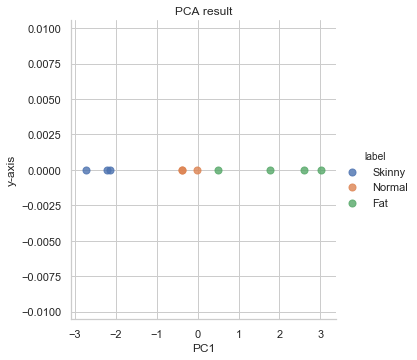

In [18]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y

sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False,
           scatter_kws={"s": 50},
           hue="label")

plt.title('PCA result')
plt.show()